# Setup

## Options

In [10]:
%load_ext autoreload
%autoreload 2

import os
import pertpy as pt
import crispr as cr
import pandas as pd

kwargs_init = dict(col_gene_symbols="gene_symbol",  
                   col_cell_type="leiden", 
                   col_perturbed="perturbed", 
                   col_guide_rna="guide_id", 
                   col_condition="target", 
                   key_control="control",
                   key_treatment="KO", kws_process_guide_rna=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download Data

In [2]:
try:
    adata = pt.dt.distance_example()
except Exception:
    adata = pt.dt.distance_example_data()
adata.layers["log1p"] = adata.X.copy()  # already log

Output()

## Object Initialization

Since the Pertpy data object already contains the pre-processed data, we'll manually add the log1p layer instead of using the Crispr class pre-processing method.

In [17]:
self = cr.Crispr(adata, **kwargs_init)



<<< INITIALIZING OMICS CLASS OBJECT >>>

col_gene_symbols="gene_symbol"
col_cell_type="leiden"
col_sample_id="standard_sample_id"
col_batch="standard_sample_id"
col_subject=None
col_condition="target"
col_num_umis=None
key_control="control"
key_treatment="KO"


<<< LOADING OBJECT >>>


Cell Counts: Initial

3200


Gene Counts: Initial



 AnnData object with n_obs × n_vars = 3200 × 2000
    obs: 'perturbation', 'grna_lenient', 'target', 'moi', 'cell_line', 'celltype', 'perturbation_type', 'cancer', 'disease', 'guide_id', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'n_counts'
    var: 'gene_id', 'mt', 'ribo', 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'log1p', 'counts'


 AnnData object with n_obs × n_vars = 3200 × 2000
    obs: 'perturbation', 'grna_lenient', 'target', 'moi', 'cell_line', 'celltype', 'perturbation_type', 'cancer', 'disease

## Clustering

Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbol', 'col_cell_type': 'leiden', 'col_sample_id': 'standard_sample_id', 'col_batch': 'standard_sample_id', 'col_condition': 'target', 'col_target_genes': 'target', 'col_perturbed': 'perturbed', 'col_guide_rna': 'guide_id', 'col_num_umis': None, 'col_guide_split': 'guide_split', 'key_control': 'control', 'key_treatment': 'KO', 'key_nonperturbed': 'NP', 'use_rep': 'X_pca', 'n_comps': 30}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>
{'n_neighbors': 30}
{'n_neighbors': 30}


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


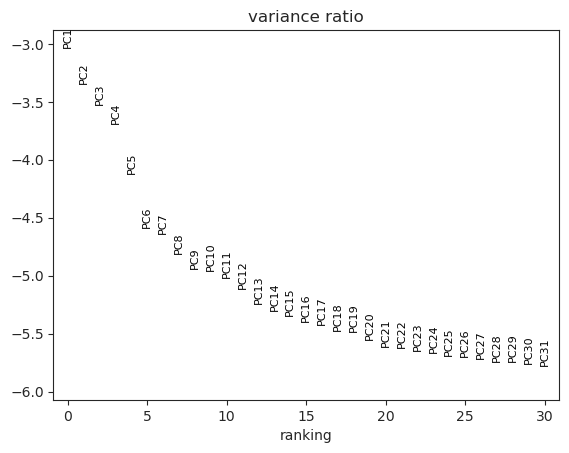

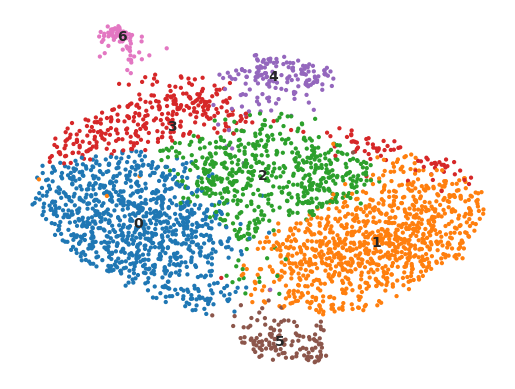

{'pca_var_ratio': None, 'umap': None}

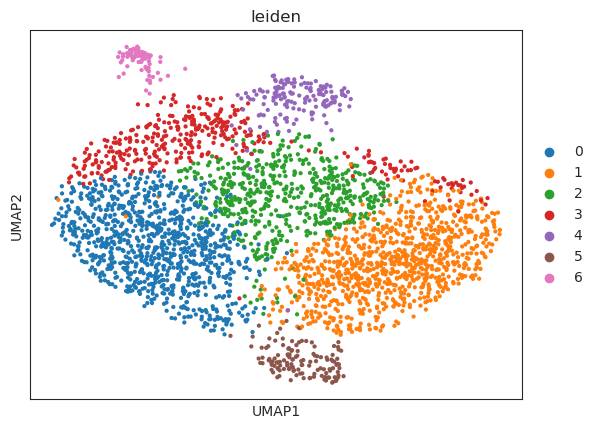

In [ ]:
self.cluster(kws_neighbors=dict(n_neighbors=30), use_rep="X_pca", 
             n_comps=30, resolution=0.5)

# Analyses


Un-used Keyword Arguments: {'n_perms': 1000, 'alpha': 0.0015, 'col_gene_symbols': 'gene_symbol', 'col_sample_id': 'standard_sample_id', 'col_batch': 'standard_sample_id', 'col_condition': 'target', 'col_perturbed': 'perturbed', 'col_guide_rna': 'guide_id', 'col_num_umis': None, 'col_guide_split': 'guide_split', 'key_control': 'control', 'key_treatment': 'KO', 'key_nonperturbed': 'NP'}

Un-used Keyword Arguments: {'n_perms': 1000, 'alpha': 0.0015, 'col_gene_symbols': 'gene_symbol', 'col_sample_id': 'standard_sample_id', 'col_batch': 'standard_sample_id', 'col_condition': 'target', 'col_perturbed': 'perturbed', 'col_guide_rna': 'guide_id', 'col_num_umis': None, 'col_guide_split': 'guide_split', 'key_control': 'control', 'key_treatment': 'KO', 'key_nonperturbed': 'NP'}


Output()

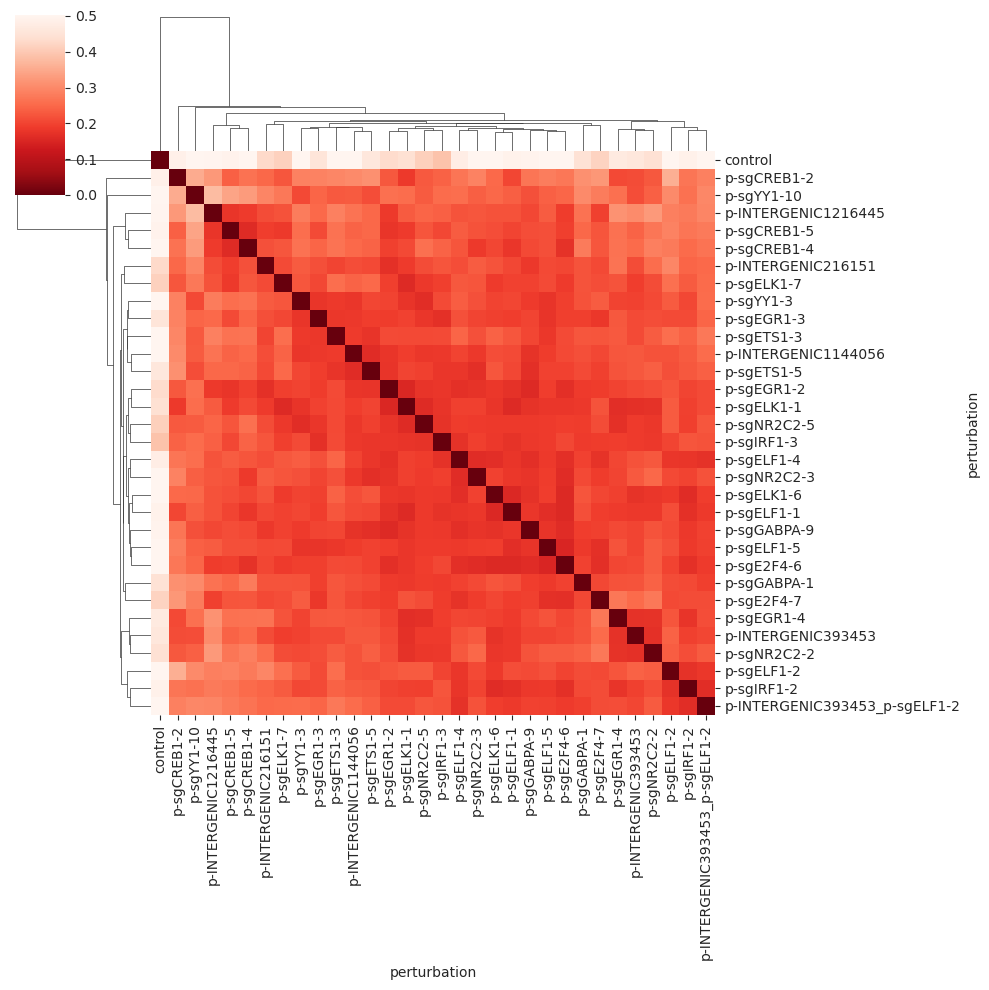

Output()

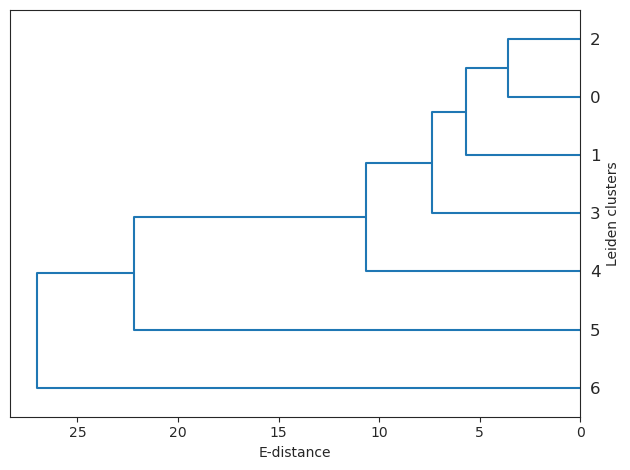

In [ ]:
out = self.compute_distance("edistance", method="X_pca", n_perms=1000, 
                            alpha=0.0015, col_target_genes="perturbation",
                            kws_plot=dict(robust=True, figsize=(10, 10)))